In [1]:
# ------ Imports & data ------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv("data/raw/TMDB_movie_dataset_v11.csv")
df = pd.read_csv('data/processed/100k_subset.csv')
pd.set_option('display.max_columns', None)


In [5]:
# ------ Basic Info & Stats------
df.head()

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,831307,538416,Vous seule que j'aime,0.0,0,Released,1939-06-29,0,95,False,0,tt0158349,fr,Vous seule que j'aime,"After the death of her trapeze artist father, ...",0.60,NaN,"Comedy, Drama",Films Félix Méric,France,French,NaN
1,94983,126031,A Woman Called Golda,8.3,7,Released,1982-04-26,0,240,False,0,tt0084914,en,A Woman Called Golda,"The story of the Russian-born, Wisconsin-raise...",3.46,NaN,"TV Movie, Drama, History","Paramount Television Studios, Operation Prime ...",United States of America,English,"israel, palestine, 1970s, jew persecution, bio..."
2,1139458,1041711,Satellites,0.0,0,Released,2011-01-01,0,7,False,0,NaN,en,Satellites,Satellites shows images of a mysterious fainti...,0.60,NaN,NaN,NaN,NaN,NaN,NaN
3,651881,1450343,Viviendo Desconectado,0.0,0,Released,NaN,0,0,False,0,NaN,en,Viviendo Desconectado,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,296437,652634,Venezuela: Wie man einen Staat zugrunde richtet,8.0,1,Released,2019-11-11,0,0,False,0,tt11328728,de,Venezuela: Wie man einen Staat zugrunde richtet,NaN,0.60,NaN,Documentary,NaN,NaN,German,NaN


In [ ]:
print(df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   id                    100000 non-null  int64  
 2   title                 99999 non-null   object 
 3   vote_average          100000 non-null  float64
 4   vote_count            100000 non-null  int64  
 5   status                100000 non-null  object 
 6   release_date          80097 non-null   object 
 7   revenue               100000 non-null  int64  
 8   runtime               100000 non-null  int64  
 9   adult                 100000 non-null  bool   
 10  budget                100000 non-null  int64  
 11  imdb_id               49246 non-null   object 
 12  original_language     100000 non-null  object 
 13  original_title        99999 non-null   object 
 14  overview              77912 non-null   object 
 15  p

In [6]:
# ------ Production companies ------

# Handle NaNs by filling with empty string, strip spaces
df['production_companies'] = df['production_companies'].fillna('').astype(str)
df['companies_list'] = df['production_companies'].str.split(',').apply(lambda x: [c.strip() for c in x if c.strip()])

exploded_df = df.explode('companies_list')

company_counts = exploded_df['companies_list'].value_counts().reset_index()
company_counts.columns = ['company', 'movie_count']

# Don't evaluate the rows with no given production company
company_counts = company_counts[company_counts['company'] != '']

company_counts.head(10)

,company,movie_count
0,Warner Bros. Pictures,265
1,Metro-Goldwyn-Mayer,264
2,BBC,241
3,Evil Angel,224
4,Columbia Pictures,222
5,Universal Pictures,215
6,ARTE,215
7,Paramount,206
8,Toei Company,206
9,ONF | NFB,203


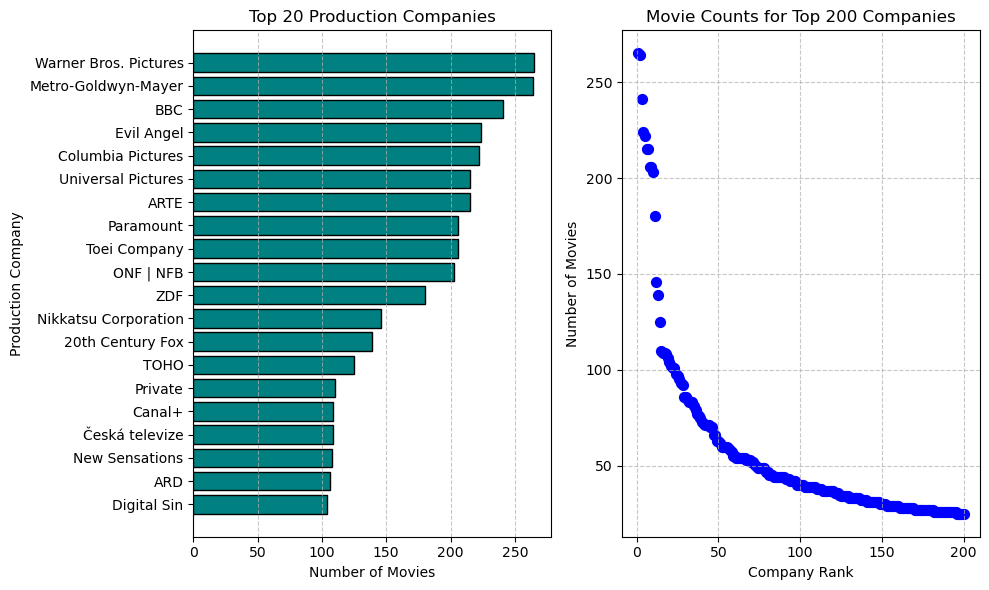

In [8]:
# ------ Visualizations ------
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

top_n_bar = 20
top_companies_bar = company_counts.head(top_n_bar)
ax1.barh(top_companies_bar['company'], top_companies_bar['movie_count'], color='teal', edgecolor='black')
ax1.set_title(f'Top {top_n_bar} Production Companies')
ax1.set_xlabel('Number of Movies')
ax1.set_ylabel('Production Company')
ax1.invert_yaxis()  # Top company at the top
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)

top_n_scatter = 200
top_companies_scatter = company_counts.head(top_n_scatter)
ranks = range(1, top_n_scatter + 1)
ax2.scatter(ranks, top_companies_scatter['movie_count'], color='blue', s=50)
ax2.set_title(f'Movie Counts for Top {top_n_scatter} Companies')
ax2.set_xlabel('Company Rank')
ax2.set_ylabel('Number of Movies')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Interpretation: Production Companies

What is standing out is, that the top companies produce exponentially more movies
than the rest of the production company landscape.

Personal Note:
Nice to see ARTE being within the Top 10!